# Random Forest Regression
Important:I should also try with sales/customer for a specific store

In [108]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['figure.figsize'] = [20.0,8.0]
plt.rcParams['figure.dpi']=80

In [109]:
df = pd.read_csv("dataset/ARIMA_prep_train.csv")

### Feature engineering

In [110]:
mean = df.groupby('StoreID')['NumberOfSales'].mean()
def meanSales(value):
    return mean.iloc[value-1000]

df['MeanStoreSales'] = df.StoreID.apply(meanSales)

In [111]:
#Result was not good

#sales_of_store = df.groupby('StoreID')['NumberOfSales'].sum()
#customers_per_store = df.groupby('StoreID')['NumberOfCustomers'].sum()
#sales_per_customer = sales_of_store / customers_per_store

#def spc(value):
 #   return sales_per_customer.iloc[value-1000]

# df['Sales_per_customer'] = df.StoreID.apply(spc)

In [112]:
events = [
    'Fog',
    'Hail',
    'Rain',
    'Snow',
    'Thunderstorm'
]

for event in events:
    df[event] = df.Events.apply(lambda x: 1 if event in x else 0)

### Creating additional attributes

In [113]:
df['Year'] = df['Date'].apply(lambda x: int(x[:4]))
df['Month'] = df['Date'].apply(lambda x: int(x[5:7]))
df['Day'] = df['Date'].apply(lambda x: int(x[8:10]))

In [114]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['day_of_week'] = df['Date'].dt.dayofweek

# RANDOM FOREST REGRESSION

In [115]:
df = df.drop(['NumberOfCustomers','IsOpen','Date','StoreID','Region','Events','Day_of_week'], axis=1)

In [116]:
df = df.drop(['AssortmentType_WithNFDept'\
             ,'AssortmentType_WithFishDept','AssortmentType_General','StoreType_SuperMarket','StoreType_HyperMarket','StoreType_StandardMarket'\
              ,'StoreType_ShoppingCenter','Is_Friday','Is_Monday','Is_Saturday','Is_Sunday','Is_Thursday','Is_Tuesday','Is_Wednesday'], axis=1)
df.head().T

,0,1,2,3,4
IsHoliday,0.000000,0.000000,0.000000,0.000000,0.000000
HasPromotions,1.000000,1.000000,1.000000,0.000000,1.000000
NearestCompetitor,326.000000,326.000000,326.000000,326.000000,326.000000
NumberOfSales,7109.000000,8041.000000,7890.000000,6005.000000,8550.000000
Region_AreaKM2,9643.000000,9643.000000,9643.000000,9643.000000,9643.000000
Region_GDP,17130.000000,17130.000000,17130.000000,17130.000000,17130.000000
Region_PopulationK,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000
CloudCover,6.000000,6.000000,5.000000,7.000000,6.000000
Max_Humidity,100.000000,87.000000,93.000000,64.000000,59.000000
Max_TemperatureC,9.000000,5.000000,7.000000,3.000000,3.000000


In [117]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve

In [118]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('NumberOfSales', axis=1).values, df.NumberOfSales.values,\
                                                    test_size = 0.2)

In [119]:
from sklearn.ensemble import RandomForestRegressor

In [120]:
params = range(5, 41, 5)  #50,201,50

In [121]:
scores, tst_scr = validation_curve(RandomForestRegressor(), X_train[:20000],\
                                   y_train[:20000], 'n_estimators', params, \
                                   cv=5, scoring='r2',n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Done  20 out of  40 | elapsed:   55.7s remaining:   55.7s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.0min finished


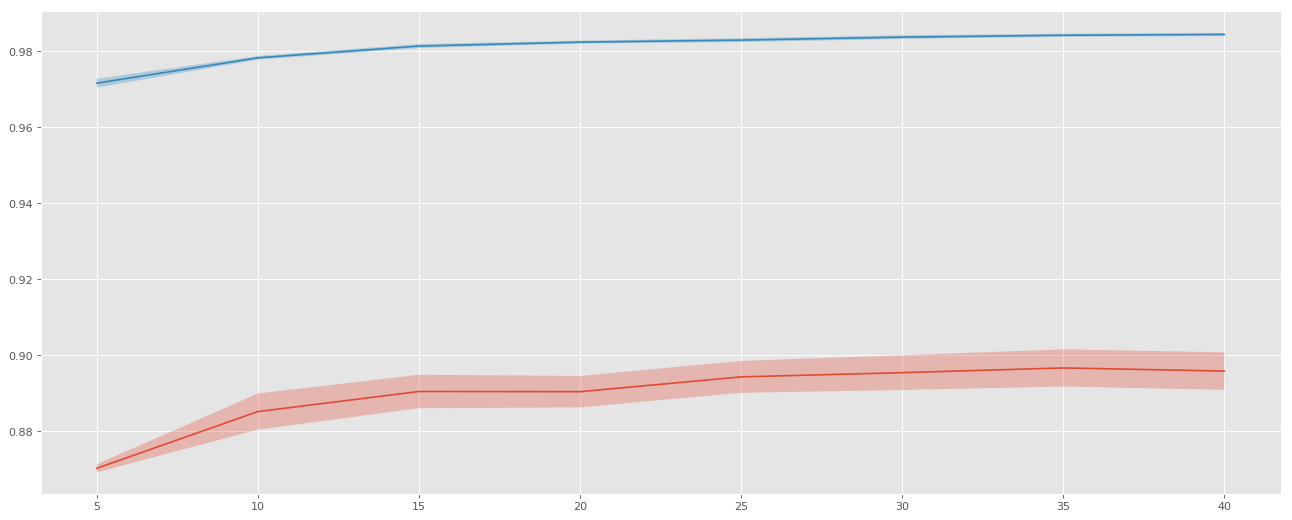

In [122]:
scores_mean = scores.mean(axis=1)
scores_std = scores.std(axis=1)
tst_scr_mean = tst_scr.mean(axis=1)
tst_scr_std = tst_scr.std(axis=1)
plt.plot(params, tst_scr_mean)
plt.fill_between(params, tst_scr_mean + tst_scr_std, tst_scr_mean - tst_scr_std, alpha=0.3)
plt.plot(params, scores_mean)
plt.fill_between(params, scores_mean + scores_std, scores_mean - scores_std, alpha=0.3)

In [123]:
X_train.shape[1]

38

In [124]:
params = range(1, 20,2)

In [125]:
scores, tst_scr = validation_curve(RandomForestRegressor(n_estimators=10), X_train[:20000], \
                                   y_train[:20000], 'max_features', params, \
                                   cv=3, scoring='r2',n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    6.9s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.0s finished


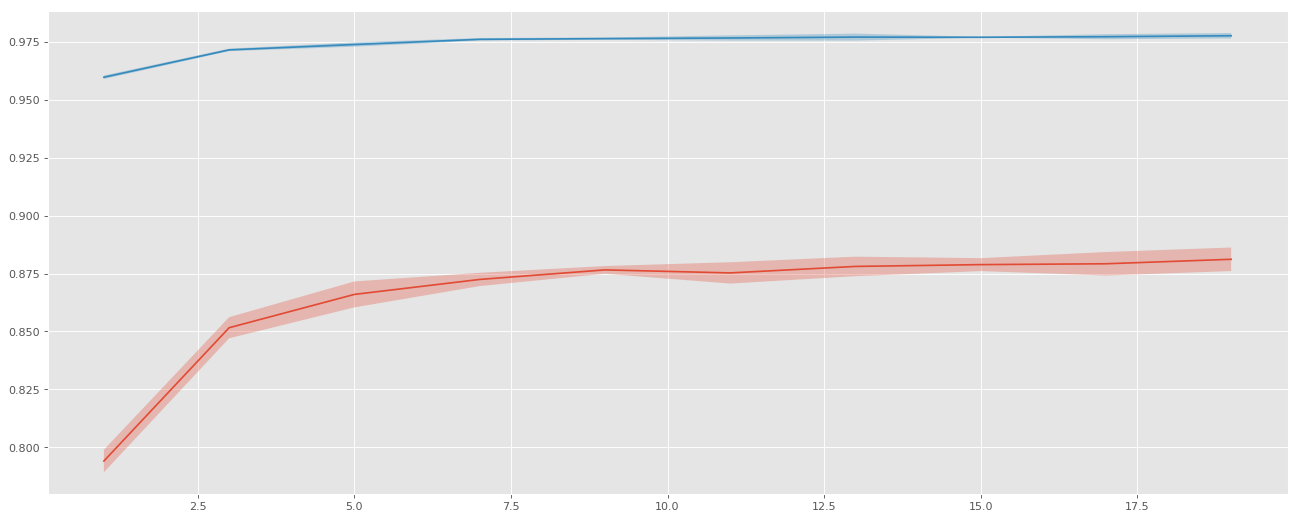

In [126]:
scores_mean = scores.mean(axis=1)
scores_std = scores.std(axis=1)
tst_scr_mean = tst_scr.mean(axis=1)
tst_scr_std = tst_scr.std(axis=1)
plt.plot(params, tst_scr_mean)
plt.fill_between(params, tst_scr_mean + tst_scr_std, tst_scr_mean - tst_scr_std, alpha=0.3)
plt.plot(params, scores_mean)
plt.fill_between(params, scores_mean + scores_std, scores_mean - scores_std, alpha=0.3)

In [127]:
params = range(10, 51, 10)

In [128]:
scores, tst_scr = validation_curve(RandomForestRegressor(n_estimators=100), X_train[:20000], \
                                   y_train[:20000], 'max_depth', params, \
                                   cv=3, scoring='r2',n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  1.4min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.5min finished


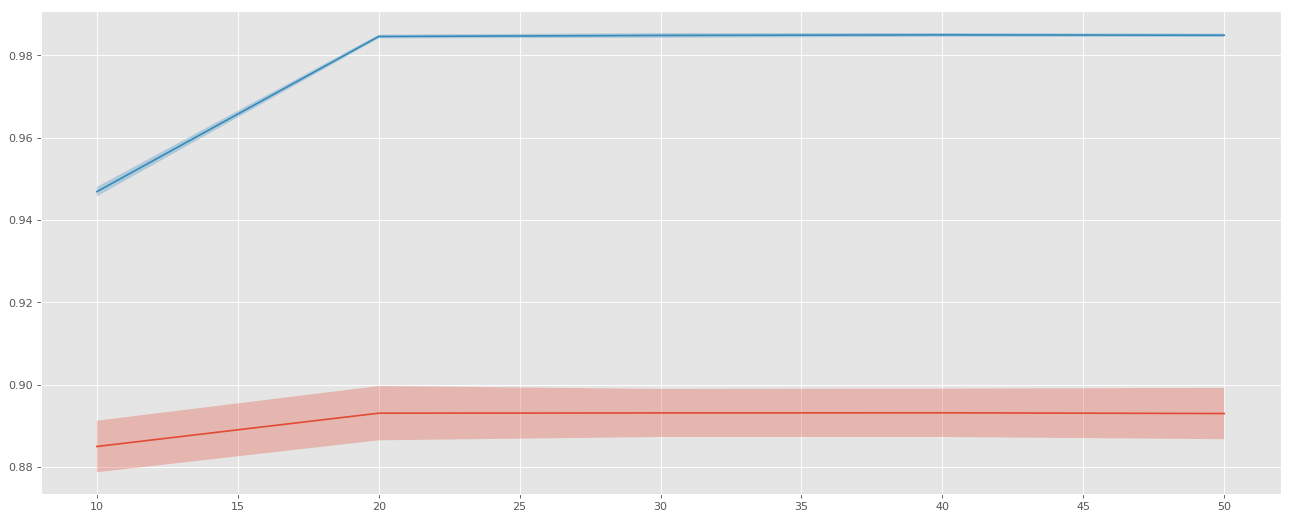

In [129]:
scores_mean = scores.mean(axis=1)
scores_std = scores.std(axis=1)
tst_scr_mean = tst_scr.mean(axis=1)
tst_scr_std = tst_scr.std(axis=1)
plt.plot(params, tst_scr_mean)
plt.fill_between(params, tst_scr_mean + tst_scr_std, tst_scr_mean - tst_scr_std, alpha=0.3)
plt.plot(params, scores_mean)
plt.fill_between(params, scores_mean + scores_std, scores_mean - scores_std, alpha=0.3)

In [130]:
model1 = RandomForestRegressor(n_estimators=80, max_depth=20, n_jobs=-1, verbose=2)

In [131]:
model1.fit(X_train, y_train)

building tree 1 of 80building tree 2 of 80building tree 3 of 80building tree 4 of 80



building tree 5 of 80
building tree 6 of 80
building tree 7 of 80
building tree 8 of 80
building tree 9 of 80
building tree 10 of 80
building tree 11 of 80
building tree 12 of 80
building tree 13 of 80
building tree 14 of 80
building tree 15 of 80
building tree 16 of 80
building tree 17 of 80
building tree 18 of 80
building tree 19 of 80
building tree 20 of 80
building tree 21 of 80
building tree 22 of 80
building tree 23 of 80
building tree 24 of 80
building tree 25 of 80
building tree 26 of 80
building tree 27 of 80
building tree 28 of 80
building tree 29 of 80
building tree 30 of 80
building tree 31 of 80
building tree 32 of 80
building tree 33 of 80
building tree 34 of 80
building tree 35 of 80
building tree 36 of 80
building tree 37 of 80


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.4min


building tree 38 of 80
building tree 39 of 80
building tree 40 of 80
building tree 41 of 80
building tree 42 of 80
building tree 43 of 80
building tree 44 of 80
building tree 45 of 80
building tree 46 of 80
building tree 47 of 80
building tree 48 of 80
building tree 49 of 80
building tree 50 of 80
building tree 51 of 80
building tree 52 of 80
building tree 53 of 80
building tree 54 of 80
building tree 55 of 80
building tree 56 of 80
building tree 57 of 80
building tree 58 of 80
building tree 59 of 80
building tree 60 of 80
building tree 61 of 80
building tree 62 of 80
building tree 63 of 80
building tree 64 of 80
building tree 65 of 80
building tree 66 of 80
building tree 67 of 80
building tree 68 of 80
building tree 69 of 80
building tree 70 of 80
building tree 71 of 80
building tree 72 of 80
building tree 73 of 80
building tree 74 of 80
building tree 75 of 80
building tree 76 of 80
building tree 77 of 80
building tree 78 of 80
building tree 79 of 80
building tree 80 of 80


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  5.6min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
           oob_score=False, random_state=None, verbose=2, warm_start=False)

In [132]:
idx = model1.feature_importances_.argsort()[::-1]

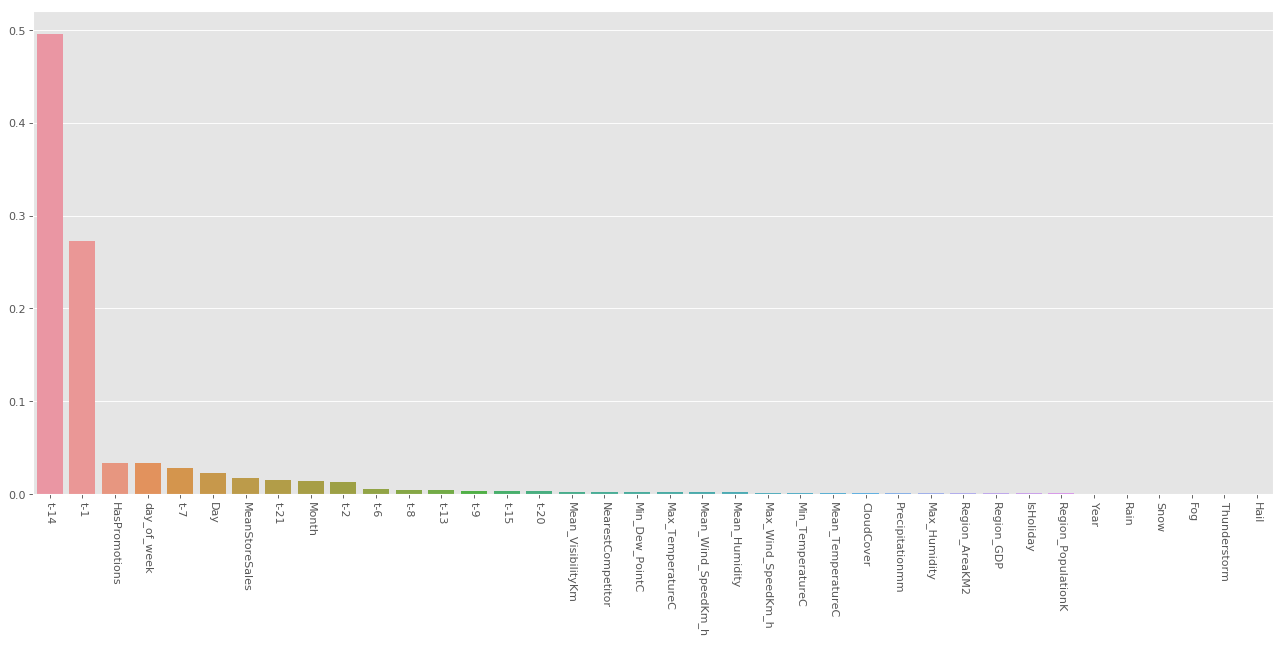

In [133]:
ax = sns.barplot(x=df.drop('NumberOfSales', axis=1).columns[idx], y=model1.feature_importances_[idx])
_ = plt.setp(ax.get_xticklabels(), rotation=-90)

In [134]:
y_pred = model1.predict(X_test)

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    2.0s finished


In [135]:
estim = model1.estimators_ 

In [136]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [137]:
mean_absolute_error(y_test, y_pred)

363.0952106021715

In [138]:
r2_score(y_test, y_pred)

0.939235646453016

In [139]:
#defining mape
from sklearn.utils import check_array
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true = y_true.reshape(1, -1)
    y_pred = y_pred.reshape(1, -1)
    #y_true, y_pred = check_array(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [140]:
mean_absolute_percentage_error(y_test, y_pred)

7.83654286105369

In [141]:
X_train

array([[0.0000e+00, 1.0000e+00, 2.5618e+04, ..., 1.0000e+00, 1.8000e+01,
        3.0000e+00],
       [0.0000e+00, 1.0000e+00, 1.8799e+04, ..., 1.1000e+01, 2.1000e+01,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 2.4740e+03, ..., 1.2000e+01, 2.4000e+01,
        5.0000e+00],
       ...,
       [0.0000e+00, 0.0000e+00, 2.8200e+02, ..., 1.0000e+00, 2.2000e+01,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 3.0730e+03, ..., 4.0000e+00, 8.0000e+00,
        5.0000e+00],
       [0.0000e+00, 0.0000e+00, 1.3790e+03, ..., 4.0000e+00, 2.8000e+01,
        4.0000e+00]])

In [142]:
X_test[:, [3]].shape

(81848, 1)

In [143]:
print("Residual sum of squares: %.2f"
  % ((y_pred - y_test) ** 2).sum())

#why memory error??

Residual sum of squares: 24508622341.69


In [151]:
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w


def rmspe(yhat, y):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe


def rmspe_xg(yhat, y):
   # y = y.values
   # y = y.get_label()
    y = np.exp(y) - 1
    yhat = np.exp(yhat) - 1
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean(w * (y - yhat)**2))
    return "rmspe", rmspe

In [152]:
rmspe_xg(y_pred,y_test)

C:\Users\Mirko\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp
C:\Users\Mirko\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp
C:\Users\Mirko\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
C:\Users\Mirko\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in subtract
C:\Users\Mirko\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in square
C:\Users\Mirko\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply


('rmspe', nan)

## Sample of predicted results

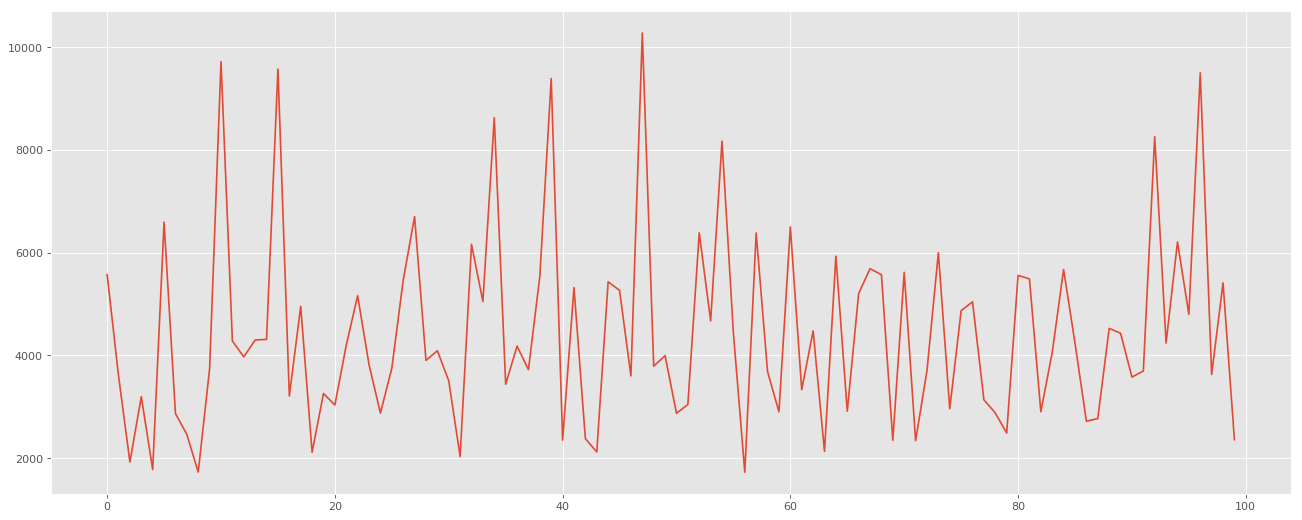

In [144]:
import matplotlib.pyplot as plt

y_pred_subset = y_pred[500:600]
x_coordinate = [ 1 * i for i in range(len(y_pred_subset)) ]
plt.plot(x_coordinate,y_pred_subset)
plt.show()

## Sample of real results

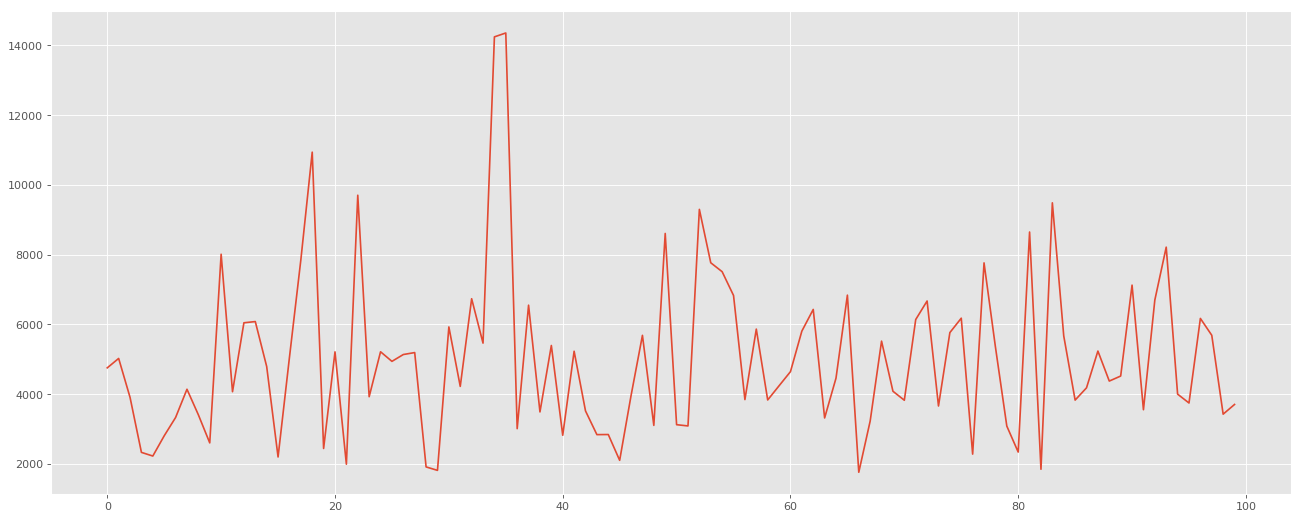

In [145]:
import matplotlib.pyplot as plt

y_train_subset = y_train[500:600]
x_coordinate = [ 1 * i for i in range(len(y_train_subset)) ]
plt.plot(x_coordinate,y_train_subset)
plt.show()

## Real-Predicted

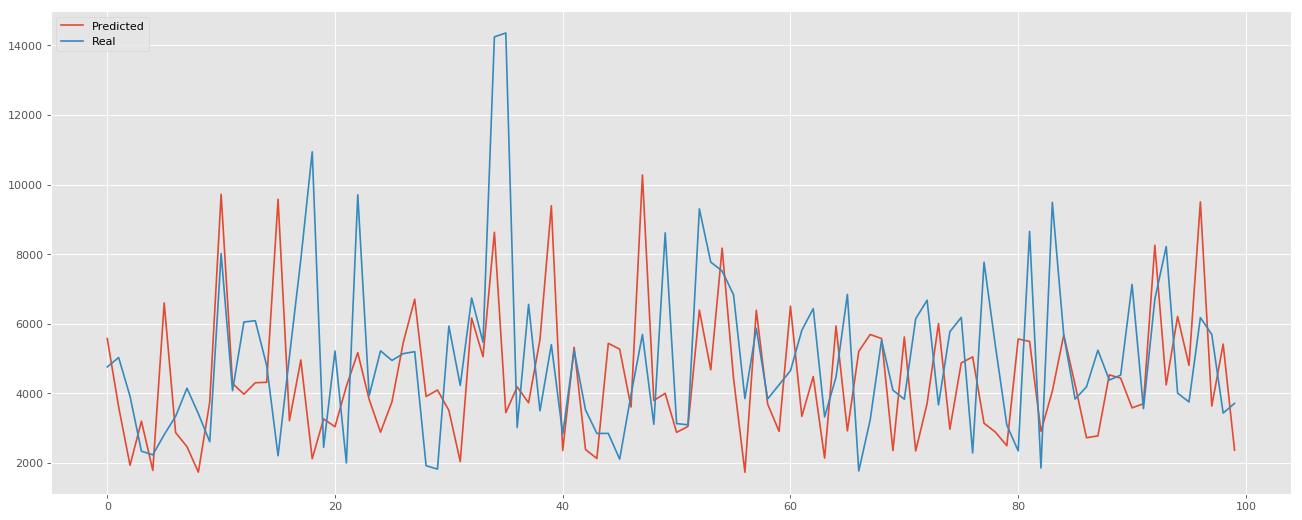

In [146]:
plt.plot(x_coordinate,y_pred_subset)
plt.plot(x_coordinate,y_train_subset)
plt.legend(['Predicted', 'Real'], loc='upper left')
plt.show()

### Saving model

In [41]:
#import pickle
#RFR_1 = pickle.dumps(model1)
#clf2 = pickle.loads(s)
#clf2.predict(X[0:1])
#pickle.dump(model1, open("models\RFR_1","wb"))
#model1 = pickle.load(file=open("models\RFR_1","rb"))

## For the submission

In [ ]:
df_test = pd.read_csv

In [ ]:
df_test.IsOpen.unique()

In [ ]:
ind_open = df_test.IsOpen == 1
ind_closed = df_test.IsOpen == 0
df_test2 = df_test[ind_open]

In [ ]:
df_test2.drop('IsOpen', axis=1, inplace=True)

In [ ]:
df_test2.head().T

In [ ]:
X_out = df_test2.values

In [ ]:
y_out = model1.predict(X_out)

In [ ]:
df_out = pd.DataFrame(np.zeros(len(df_test)), columns=['NumberOfSales'])

In [ ]:
df_out[ind_open] = y_out.reshape(-1,1)

In [ ]:
df_out.set_index(np.arange(len(df_out))+1, inplace=True)

In [ ]:
df_out.index.name = 'Id'

In [ ]:
df_out.head()